In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
#import statsmodels
import matplotlib.pyplot as plt
#import math

## Read in Data
df = pd.read_csv("all_data.csv")
print(df.head())
print("Columns:")
print(df.columns)
print("Unique Countries:")
print(df.Country.unique())

print("Unique years:")
print(df.Year.unique())
'''print("Describe:")
print(df.describe)'''
## Task 1
#print(np.mean(flight.coach_price))
#print(np.median(flight.coach_price))



  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Columns:
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
Unique Countries:
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Unique years:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


'print("Describe:")\nprint(df.describe)'

Let's explore the data a little, starting with life expectancy over the years

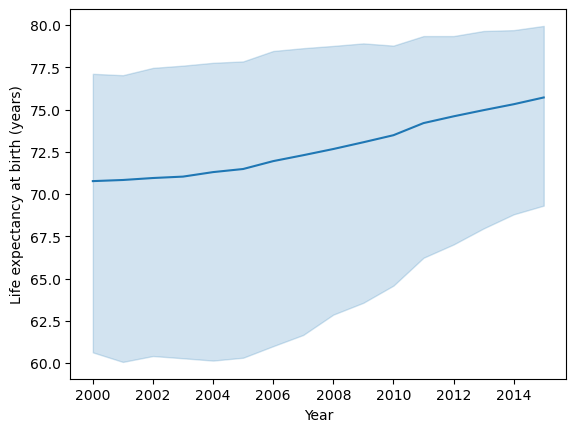

<Figure size 640x480 with 0 Axes>

In [19]:
sns.lineplot(data=df, x="Year", y="Life expectancy at birth (years)")
plt.show()
plt.clf()

Quite a large spread here.
Let's separate this out by country.


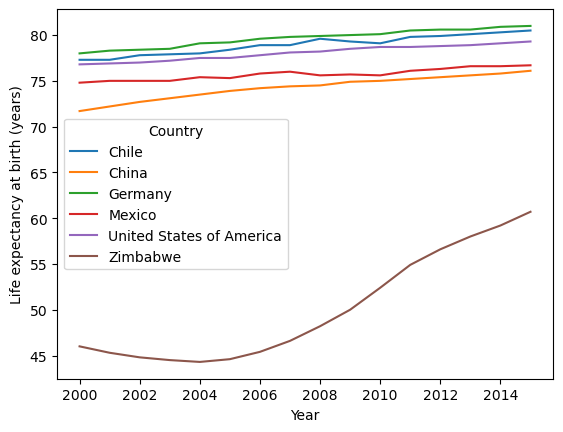

<Figure size 640x480 with 0 Axes>

In [20]:
sns.lineplot(data=df, x="Year", y="Life expectancy at birth (years)", hue='Country')
plt.show()
plt.clf()

Most countries here are fairly similar, except for Zimbabwe which has far less expectancy when compared to the others.
All country's life expectancy is rising throughout the years, with Zimbabwe rising the fastest.

Let's Look at GDP by county

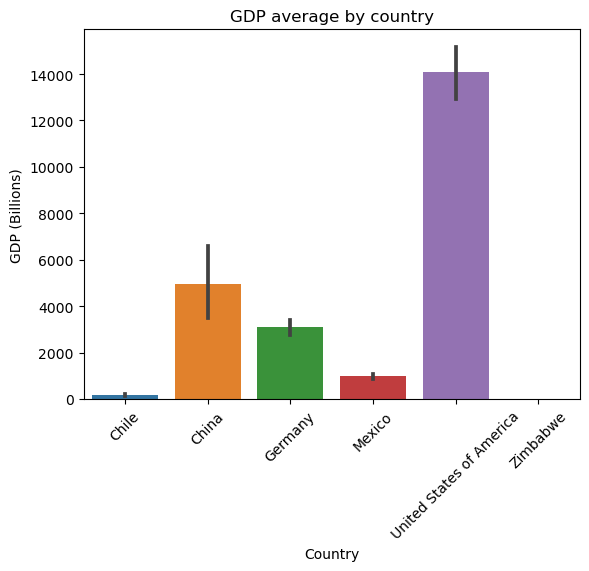

<Figure size 640x480 with 0 Axes>

In [23]:
#Means = df.groupby('Country').mean()
#print(Means)

df['gdpBillions'] = df.GDP / 1e9
ax = sns.barplot(data=df, x="Country", y="gdpBillions")
ax.set(xlabel='Country', ylabel='GDP (Billions)')
plt.xticks(rotation=45)
plt.title("GDP average by country")
plt.show()
plt.clf()


How is GDP changing through the years? Let's have a look.


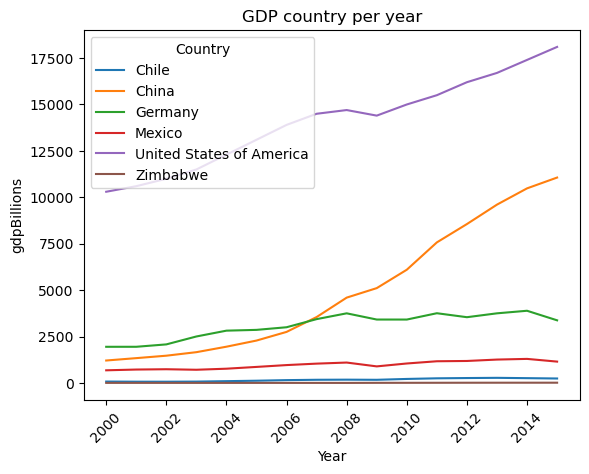

<Figure size 640x480 with 0 Axes>

In [46]:
sns.lineplot(data=df, x="Year", y="gdpBillions", hue='Country')
ax.set(xlabel='Year', ylabel='GDP (Billions)')
plt.xticks(rotation=45)
plt.title("GDP country per year")
plt.show()
plt.clf()

The US is rising steadily, China is rapidly increasing and other countries look like they're remaining fairly stable. But let's remove the outliers and zoom in on the lower section.

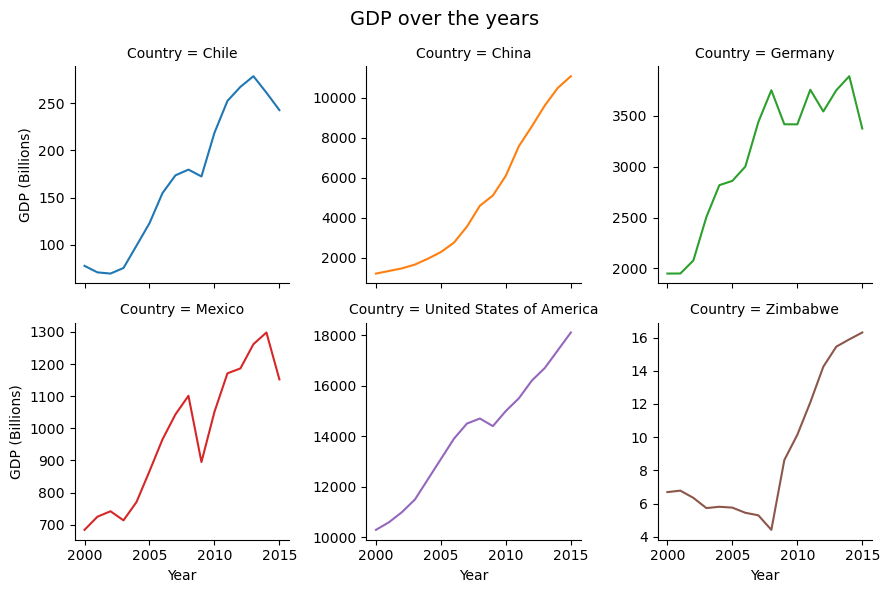

<Figure size 640x480 with 0 Axes>

In [40]:
g = sns.FacetGrid(df, col='Country', hue='Country', col_wrap=3, sharey=False)
g.map(sns.lineplot,'Year','gdpBillions')
g.set_ylabels('GDP (Billions)')
g.fig.suptitle('GDP over the years', fontsize=14)
g.fig.tight_layout(rect=[0, 0, 1, 1])
plt.show()
plt.clf()

A clearer picture emerges when split up; every country is improving once the dominant growth of the US is separated.
Zimbabwe experiences negative growth until around 2007.

Lets see if life expectancy is correlated with GDP growth.

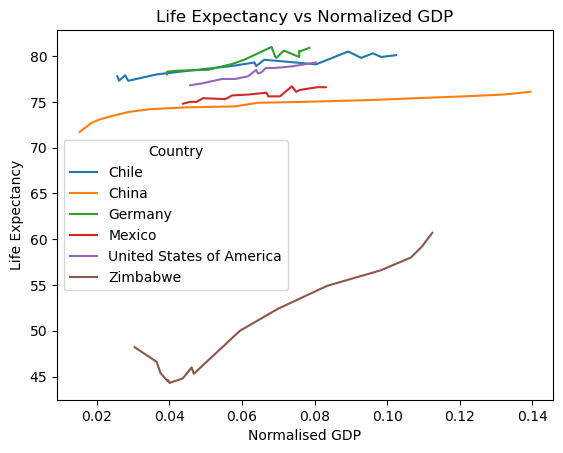

"g.map(sns.scatterplot,'Life expectancy at birth (years)','gdpBillions')\ng.set_ylabels('GDP (Billions)')\ng.fig.suptitle('GDP over the years', fontsize=14)\ng.fig.tight_layout(rect=[0, 0, 1, 1])"

<Figure size 640x480 with 0 Axes>

In [59]:
#Normalize the data as the spread between the countries is very large.
df['norm_GDP'] = df['GDP'] / df.groupby('Country')['GDP'].transform('sum')

ax = sns.lineplot(data=df, x='norm_GDP', y='Life expectancy at birth (years)', hue='Country')
plt.title("Life Expectancy vs Normalized GDP")
ax.set(xlabel='Normalised GDP', ylabel='Life Expectancy')
plt.show()
plt.clf()


Test a hypothesis using stats to get the p value:

In [70]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
countries = df['Country'].unique()

for i in countries:
    cty = df[df.Country == i]
    tstatistic, pval = ttest_ind(cty['Life expectancy at birth (years)'], cty.GDP)
    if pval < 0.05:
        print(f'The p value of {i} is {pval:.3E}, which means that the Life expectancy is dependent on the GDP')
    else:
        print(f'The p value of {i} is {pval}, which means that the Life expectancy is NOT dependent on the GDP')

The p value of Chile is 7.556E-10, which means that the Life expectancy is dependent on the GDP
The p value of China is 3.576E-06, which means that the Life expectancy is dependent on the GDP
The p value of Germany is 5.513E-18, which means that the Life expectancy is dependent on the GDP
The p value of Mexico is 4.786E-18, which means that the Life expectancy is dependent on the GDP
The p value of United States of America is 1.096E-20, which means that the Life expectancy is dependent on the GDP
The p value of Zimbabwe is 2.063E-09, which means that the Life expectancy is dependent on the GDP
